In [2]:
import numpy as np 
import pandas as pd
import gensim
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [4]:
df_neg = pd.read_csv('neg.txt',sep='|', names=['Thai_Text'])

In [5]:
df_neg

,Thai_Text
0,☹️
1,😔
2,😞
3,😥
4,รำ
...,...
6818,รางวัลอะไร อินเตอร์ตายล่ะ #True เป็นบริษัทระดั...
6819,เป็นอัยการภาษาไทยนี่แหละครับ อ่านครับที่คุณว่า...
6820,ข้าวโถละร้อย แพง เพราะตักเป็นจานๆละ15 เต็มที่ก...
6821,ก่อนหน้านี้เคยพูดถึงสิ่งที่ Isuzu D-Max ควรเพิ...


In [6]:
df_neg['Sentiment'] = [ 'neg' for i in range(df_neg['Thai_Text'].size)]

In [7]:
df_neg

,Thai_Text,Sentiment
0,☹️,neg
1,😔,neg
2,😞,neg
3,😥,neg
4,รำ,neg
...,...,...
6818,รางวัลอะไร อินเตอร์ตายล่ะ #True เป็นบริษัทระดั...,neg
6819,เป็นอัยการภาษาไทยนี่แหละครับ อ่านครับที่คุณว่า...,neg
6820,ข้าวโถละร้อย แพง เพราะตักเป็นจานๆละ15 เต็มที่ก...,neg
6821,ก่อนหน้านี้เคยพูดถึงสิ่งที่ Isuzu D-Max ควรเพิ...,neg


In [8]:
df_pos = pd.read_csv('pos.txt',sep='|', names=['Thai_Text'])

In [9]:
df_pos

,Thai_Text
0,:3
1,☺️
2,🤤
3,🤪
4,😁
...,...
4773,พูดถึงรถยนต์ตัวท็อปที่อีซูซุผลิต หนึ่งในนั้นต้...
4774,เรื่องประทับใจเกิดที่ the mall บางแค ค่ะ ❤️ เป...
4775,🌞แสงแดดเมืองไทย โดยเฉพาะหน้าร้อนอย่างเดือนเมษา...
4776,เราชื่นชอบและเป็นลูกค้าที่ใช้บริการ มานานถึง 3...


In [10]:
df_pos['Sentiment'] = [ 'pos' for i in range(df_pos['Thai_Text'].size)]

In [11]:
df_q = pd.read_csv('q.txt',sep='|', names=['Thai_Text'])

In [12]:
df_q['Sentiment'] = [ 'q' for i in range(df_q['Thai_Text'].size)]

In [13]:
df_neu = pd.read_csv('neu.txt',sep='|', names=['Thai_Text'])

In [14]:
df_neu['Sentiment'] = [ 'neu' for i in range(df_neu['Thai_Text'].size)]

In [15]:
frames = [df_neg, df_pos, df_q, df_neu]

In [16]:
frames

[                                              Thai_Text Sentiment
 0                                                    ☹️       neg
 1                                                     😔       neg
 2                                                     😞       neg
 3                                                     😥       neg
 4                                                    รำ       neg
 ...                                                 ...       ...
 6818  รางวัลอะไร อินเตอร์ตายล่ะ #True เป็นบริษัทระดั...       neg
 6819  เป็นอัยการภาษาไทยนี่แหละครับ อ่านครับที่คุณว่า...       neg
 6820  ข้าวโถละร้อย แพง เพราะตักเป็นจานๆละ15 เต็มที่ก...       neg
 6821  ก่อนหน้านี้เคยพูดถึงสิ่งที่ Isuzu D-Max ควรเพิ...       neg
 6822  เข้าไปอ่านคอมเมนท์ละโมโหนะ ที่บอกว่า เรียกร้อง...       neg
 
 [6823 rows x 2 columns],
                                               Thai_Text Sentiment
 0                                                    :3       pos
 1                                

In [17]:
data = pd.concat(frames,ignore_index=True)

In [18]:
data

,Thai_Text,Sentiment
0,☹️,neg
1,😔,neg
2,😞,neg
3,😥,neg
4,รำ,neg
...,...,...
26732,เกร็ดความรู้ วิธีรักษาสิวแบบธรรมชาติด้วยใบสะเด...,neu
26733,และงานใหญ่ประจำปี ขายบัตรแล้ว!! พร้อมเพิ่มวง L...,neu
26734,และงานใหญ่ประจำปี บ้ตร sold out ทุกปี - ขายบัต...,neu
26735,การแข่งขัน ไทยแลนด์ ดีเวลล็อบเม้นท์ ทัวร์ ( ที...,neu


In [19]:
data['Sentiment'].value_counts()

neu    14561
neg     6823
pos     4778
q        575
Name: Sentiment, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26737 entries, 0 to 26736
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Thai_Text  26737 non-null  object
 1   Sentiment  26737 non-null  object
dtypes: object(2)
memory usage: 417.9+ KB


In [21]:
data['Thai_Text'].to_csv('Thai_text.txt', sep=' ', index=False, header=False)

In [22]:
data

,Thai_Text,Sentiment
0,☹️,neg
1,😔,neg
2,😞,neg
3,😥,neg
4,รำ,neg
...,...,...
26732,เกร็ดความรู้ วิธีรักษาสิวแบบธรรมชาติด้วยใบสะเด...,neu
26733,และงานใหญ่ประจำปี ขายบัตรแล้ว!! พร้อมเพิ่มวง L...,neu
26734,และงานใหญ่ประจำปี บ้ตร sold out ทุกปี - ขายบัต...,neu
26735,การแข่งขัน ไทยแลนด์ ดีเวลล็อบเม้นท์ ทัวร์ ( ที...,neu


In [23]:
#READING A DATA FILE (TAGS range from 0 to len(data))
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

def read_corpus(fname, tokens_only=False):
    with open(fname, encoding="iso-8859-1") as f:
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])


#THIS CREATES A TRAINING CORPUS
train_corpus = list(read_corpus("Thai_text.txt"))


In [24]:
train_corpus

[TaggedDocument(words=['¹ï'], tags=[0]),
 TaggedDocument(words=[], tags=[1]),
 TaggedDocument(words=[], tags=[2]),
 TaggedDocument(words=[], tags=[3]),
 TaggedDocument(words=[], tags=[4]),
 TaggedDocument(words=['noà¹'], tags=[5]),
 TaggedDocument(words=['rip'], tags=[6]),
 TaggedDocument(words=['t_t'], tags=[7]),
 TaggedDocument(words=['²à'], tags=[8]),
 TaggedDocument(words=['à¹'], tags=[9]),
 TaggedDocument(words=[], tags=[10]),
 TaggedDocument(words=['à¹'], tags=[11]),
 TaggedDocument(words=['²à'], tags=[12]),
 TaggedDocument(words=['à¹'], tags=[13]),
 TaggedDocument(words=[], tags=[14]),
 TaggedDocument(words=['à¹'], tags=[15]),
 TaggedDocument(words=[], tags=[16]),
 TaggedDocument(words=['à¹'], tags=[17]),
 TaggedDocument(words=['à¹', 'à¹'], tags=[18]),
 TaggedDocument(words=['à¹', 'à¹', 'à¹'], tags=[19]),
 TaggedDocument(words=['³ð'], tags=[20]),
 TaggedDocument(words=[], tags=[21]),
 TaggedDocument(words=['à¹'], tags=[22]),
 TaggedDocument(words=['à¹', 'à¹', 'à¹', 'à¹'], tags=[

In [25]:
#INSTANTIATE THE GENSIM DOC2VEC MODEL
model = gensim.models.doc2vec.Doc2Vec(vector_size=20, min_count=5, epochs=40)

#CREATE VOCABULARY
model.build_vocab(train_corpus)

#TRAIN THE GENSIM MODEL USING train_corpus
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)
#https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html

In [26]:
X = []
for doc_id in range(len(train_corpus)):
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)
    X.append(inferred_vector)
X = np.vstack(X)
print('\n')
print("Shape of X is : ",X.shape)



Shape of X is :  (26737, 20)


In [27]:
X

array([[ 3.27974677e-01, -2.47852221e-01,  9.43595171e-02, ...,
         2.04532489e-01, -1.51469698e-02, -1.15676746e-01],
       [ 1.97122749e-02,  1.98662933e-02,  1.58903860e-02, ...,
         1.44673581e-03, -3.79900634e-03,  1.83969382e-02],
       [-9.77754779e-03,  9.01158154e-03, -8.79087020e-03, ...,
        -1.60913635e-02,  1.88160501e-02,  1.97544303e-02],
       ...,
       [ 1.09472978e+00,  6.59849346e-01,  2.78089213e+00, ...,
        -1.81317246e+00,  6.12966359e-01, -3.94002795e-01],
       [ 5.04954517e-01, -3.19793731e-01, -1.13580811e+00, ...,
        -7.09443569e-01,  5.04301310e-01,  9.20623302e-01],
       [ 1.54470220e-01,  1.50288686e-01, -3.16331893e-01, ...,
        -8.24780669e-03,  1.00068808e+00,  1.43407881e+00]], dtype=float32)

In [28]:
att = ['a1', 'a2','a3','a4','a5','a6','a7','a8','a9','a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20']

df = pd.DataFrame(X, columns = att)
df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20
0,0.327975,-0.247852,0.094360,0.251593,-0.184679,0.227734,-0.052100,-0.041117,-0.116193,-0.150487,-0.178419,0.067336,-0.161764,-0.172254,-0.556933,-0.062671,-0.079398,0.204532,-0.015147,-0.115677
1,0.019712,0.019866,0.015890,-0.013443,-0.019676,0.012936,-0.003778,-0.013626,-0.019420,-0.014259,0.023817,0.024961,-0.001727,-0.012195,0.014371,0.024173,0.023643,0.001447,-0.003799,0.018397
2,-0.009778,0.009012,-0.008791,0.021635,0.015313,0.000284,-0.011991,0.006812,0.009423,0.024684,-0.021500,-0.000403,-0.024338,-0.019901,0.013355,-0.010612,0.021315,-0.016091,0.018816,0.019754
3,0.008429,-0.024862,0.019393,0.011575,0.020142,-0.011294,-0.008920,-0.004944,-0.021282,0.000951,-0.023175,-0.017476,0.007075,0.018244,0.002100,-0.019439,-0.006410,0.001654,-0.016614,0.020050
4,-0.007208,-0.016351,0.014969,0.021337,0.004062,-0.004676,0.024213,-0.017453,0.003983,0.023368,0.013392,0.002583,-0.006763,-0.019239,-0.019391,0.002117,0.014651,0.017240,-0.010581,-0.016170


In [29]:
df['Sentiment'] = data['Sentiment']

In [30]:
df

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a12,a13,a14,a15,a16,a17,a18,a19,a20,Sentiment
0,0.327975,-0.247852,0.094360,0.251593,-0.184679,0.227734,-0.052100,-0.041117,-0.116193,-0.150487,...,0.067336,-0.161764,-0.172254,-0.556933,-0.062671,-0.079398,0.204532,-0.015147,-0.115677,neg
1,0.019712,0.019866,0.015890,-0.013443,-0.019676,0.012936,-0.003778,-0.013626,-0.019420,-0.014259,...,0.024961,-0.001727,-0.012195,0.014371,0.024173,0.023643,0.001447,-0.003799,0.018397,neg
2,-0.009778,0.009012,-0.008791,0.021635,0.015313,0.000284,-0.011991,0.006812,0.009423,0.024684,...,-0.000403,-0.024338,-0.019901,0.013355,-0.010612,0.021315,-0.016091,0.018816,0.019754,neg
3,0.008429,-0.024862,0.019393,0.011575,0.020142,-0.011294,-0.008920,-0.004944,-0.021282,0.000951,...,-0.017476,0.007075,0.018244,0.002100,-0.019439,-0.006410,0.001654,-0.016614,0.020050,neg
4,-0.007208,-0.016351,0.014969,0.021337,0.004062,-0.004676,0.024213,-0.017453,0.003983,0.023368,...,0.002583,-0.006763,-0.019239,-0.019391,0.002117,0.014651,0.017240,-0.010581,-0.016170,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26732,0.103937,0.354838,-0.090710,0.043308,-0.197671,-0.364695,0.356886,-0.441531,0.601497,-0.116497,...,0.419107,-0.361146,0.126083,-0.931561,-0.436777,-0.622730,-0.725207,0.952281,0.933599,neu
26733,1.023562,0.506156,2.717282,0.267333,-1.317216,-0.779951,0.181486,0.557379,-2.079285,-0.332807,...,0.093057,0.856885,-0.159762,0.633476,-1.433954,-1.775760,-1.615498,0.379248,-0.290021,neu
26734,1.094730,0.659849,2.780892,0.120180,-1.383309,-0.659163,0.049703,0.500120,-2.223940,-0.460534,...,0.119594,1.064218,-0.085183,0.572452,-1.657125,-2.036918,-1.813172,0.612966,-0.394003,neu
26735,0.504955,-0.319794,-1.135808,-0.203094,-0.725135,-0.386949,0.813377,0.039350,-0.009490,-0.581911,...,0.401934,0.303943,-0.656364,-0.435821,-0.686436,-0.658559,-0.709444,0.504301,0.920623,neu


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26737 entries, 0 to 26736
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   a1         26737 non-null  float32
 1   a2         26737 non-null  float32
 2   a3         26737 non-null  float32
 3   a4         26737 non-null  float32
 4   a5         26737 non-null  float32
 5   a6         26737 non-null  float32
 6   a7         26737 non-null  float32
 7   a8         26737 non-null  float32
 8   a9         26737 non-null  float32
 9   a10        26737 non-null  float32
 10  a11        26737 non-null  float32
 11  a12        26737 non-null  float32
 12  a13        26737 non-null  float32
 13  a14        26737 non-null  float32
 14  a15        26737 non-null  float32
 15  a16        26737 non-null  float32
 16  a17        26737 non-null  float32
 17  a18        26737 non-null  float32
 18  a19        26737 non-null  float32
 19  a20        26737 non-null  float32
 20  Sentim

In [32]:
df.Sentiment.value_counts()

neu    14561
neg     6823
pos     4778
q        575
Name: Sentiment, dtype: int64

<AxesSubplot:>

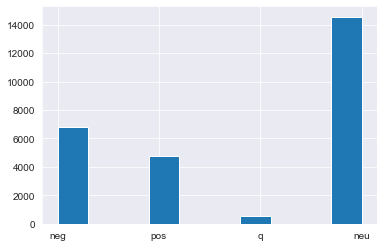

In [33]:
df['Sentiment'].hist()

<AxesSubplot:>

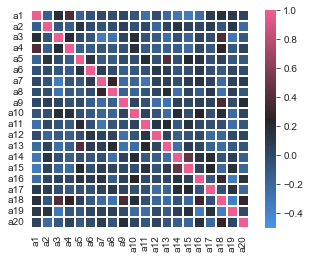

In [34]:
corr = df.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

<AxesSubplot:xlabel='a1', ylabel='Count'>

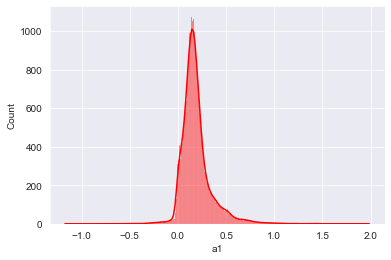

In [35]:
sns.histplot(df, x="a1", kde=True, color='r')

In [36]:
d = {'pos': 0, 'neg': 1, 'q':2, 'neu':3}

In [37]:
df

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a12,a13,a14,a15,a16,a17,a18,a19,a20,Sentiment
0,0.327975,-0.247852,0.094360,0.251593,-0.184679,0.227734,-0.052100,-0.041117,-0.116193,-0.150487,...,0.067336,-0.161764,-0.172254,-0.556933,-0.062671,-0.079398,0.204532,-0.015147,-0.115677,neg
1,0.019712,0.019866,0.015890,-0.013443,-0.019676,0.012936,-0.003778,-0.013626,-0.019420,-0.014259,...,0.024961,-0.001727,-0.012195,0.014371,0.024173,0.023643,0.001447,-0.003799,0.018397,neg
2,-0.009778,0.009012,-0.008791,0.021635,0.015313,0.000284,-0.011991,0.006812,0.009423,0.024684,...,-0.000403,-0.024338,-0.019901,0.013355,-0.010612,0.021315,-0.016091,0.018816,0.019754,neg
3,0.008429,-0.024862,0.019393,0.011575,0.020142,-0.011294,-0.008920,-0.004944,-0.021282,0.000951,...,-0.017476,0.007075,0.018244,0.002100,-0.019439,-0.006410,0.001654,-0.016614,0.020050,neg
4,-0.007208,-0.016351,0.014969,0.021337,0.004062,-0.004676,0.024213,-0.017453,0.003983,0.023368,...,0.002583,-0.006763,-0.019239,-0.019391,0.002117,0.014651,0.017240,-0.010581,-0.016170,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26732,0.103937,0.354838,-0.090710,0.043308,-0.197671,-0.364695,0.356886,-0.441531,0.601497,-0.116497,...,0.419107,-0.361146,0.126083,-0.931561,-0.436777,-0.622730,-0.725207,0.952281,0.933599,neu
26733,1.023562,0.506156,2.717282,0.267333,-1.317216,-0.779951,0.181486,0.557379,-2.079285,-0.332807,...,0.093057,0.856885,-0.159762,0.633476,-1.433954,-1.775760,-1.615498,0.379248,-0.290021,neu
26734,1.094730,0.659849,2.780892,0.120180,-1.383309,-0.659163,0.049703,0.500120,-2.223940,-0.460534,...,0.119594,1.064218,-0.085183,0.572452,-1.657125,-2.036918,-1.813172,0.612966,-0.394003,neu
26735,0.504955,-0.319794,-1.135808,-0.203094,-0.725135,-0.386949,0.813377,0.039350,-0.009490,-0.581911,...,0.401934,0.303943,-0.656364,-0.435821,-0.686436,-0.658559,-0.709444,0.504301,0.920623,neu


In [38]:
df['Sentiment'] = df.Sentiment.apply(lambda x: d.get(x, x))

In [39]:
df = df.dropna()

In [40]:
df

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a12,a13,a14,a15,a16,a17,a18,a19,a20,Sentiment
0,0.327975,-0.247852,0.094360,0.251593,-0.184679,0.227734,-0.052100,-0.041117,-0.116193,-0.150487,...,0.067336,-0.161764,-0.172254,-0.556933,-0.062671,-0.079398,0.204532,-0.015147,-0.115677,1
1,0.019712,0.019866,0.015890,-0.013443,-0.019676,0.012936,-0.003778,-0.013626,-0.019420,-0.014259,...,0.024961,-0.001727,-0.012195,0.014371,0.024173,0.023643,0.001447,-0.003799,0.018397,1
2,-0.009778,0.009012,-0.008791,0.021635,0.015313,0.000284,-0.011991,0.006812,0.009423,0.024684,...,-0.000403,-0.024338,-0.019901,0.013355,-0.010612,0.021315,-0.016091,0.018816,0.019754,1
3,0.008429,-0.024862,0.019393,0.011575,0.020142,-0.011294,-0.008920,-0.004944,-0.021282,0.000951,...,-0.017476,0.007075,0.018244,0.002100,-0.019439,-0.006410,0.001654,-0.016614,0.020050,1
4,-0.007208,-0.016351,0.014969,0.021337,0.004062,-0.004676,0.024213,-0.017453,0.003983,0.023368,...,0.002583,-0.006763,-0.019239,-0.019391,0.002117,0.014651,0.017240,-0.010581,-0.016170,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26732,0.103937,0.354838,-0.090710,0.043308,-0.197671,-0.364695,0.356886,-0.441531,0.601497,-0.116497,...,0.419107,-0.361146,0.126083,-0.931561,-0.436777,-0.622730,-0.725207,0.952281,0.933599,3
26733,1.023562,0.506156,2.717282,0.267333,-1.317216,-0.779951,0.181486,0.557379,-2.079285,-0.332807,...,0.093057,0.856885,-0.159762,0.633476,-1.433954,-1.775760,-1.615498,0.379248,-0.290021,3
26734,1.094730,0.659849,2.780892,0.120180,-1.383309,-0.659163,0.049703,0.500120,-2.223940,-0.460534,...,0.119594,1.064218,-0.085183,0.572452,-1.657125,-2.036918,-1.813172,0.612966,-0.394003,3
26735,0.504955,-0.319794,-1.135808,-0.203094,-0.725135,-0.386949,0.813377,0.039350,-0.009490,-0.581911,...,0.401934,0.303943,-0.656364,-0.435821,-0.686436,-0.658559,-0.709444,0.504301,0.920623,3


In [41]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [42]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [43]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

In [44]:
print(df.iloc[:,:-1].values)

[[ 3.27974677e-01 -2.47852221e-01  9.43595171e-02 ...  2.04532489e-01
  -1.51469698e-02 -1.15676746e-01]
 [ 1.97122749e-02  1.98662933e-02  1.58903860e-02 ...  1.44673581e-03
  -3.79900634e-03  1.83969382e-02]
 [-9.77754779e-03  9.01158154e-03 -8.79087020e-03 ... -1.60913635e-02
   1.88160501e-02  1.97544303e-02]
 ...
 [ 1.09472978e+00  6.59849346e-01  2.78089213e+00 ... -1.81317246e+00
   6.12966359e-01 -3.94002795e-01]
 [ 5.04954517e-01 -3.19793731e-01 -1.13580811e+00 ... -7.09443569e-01
   5.04301310e-01  9.20623302e-01]
 [ 1.54470220e-01  1.50288686e-01 -3.16331893e-01 ... -8.24780669e-03
   1.00068808e+00  1.43407881e+00]]


In [45]:
X_test = df.iloc[:,:-1].values
Y_pred = naive_bayes_gaussian(df, X=X_test, Y="Sentiment")

In [46]:
Y_pred

array([3, 0, 0, ..., 3, 3, 3])

In [47]:
print(df.iloc[:,-1].values)

[1 1 1 ... 3 3 3]


In [48]:
# Training Accuracy 
y_true = df.iloc[:,-1].values
acc = np.sum(np.equal(y_true, Y_pred)) / len(y_true)
print("Accuracy is : ", acc)

Accuracy is :  0.34843101320267794
